In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [86]:
#1

In [87]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [88]:
df.shape

(17414, 10)

In [89]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [91]:
df['weather_code'] = df['weather_code'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)
df['is_weekend'] = df['is_weekend'].astype(int)
df['season'] = df['season'].astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [93]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [94]:
#2

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

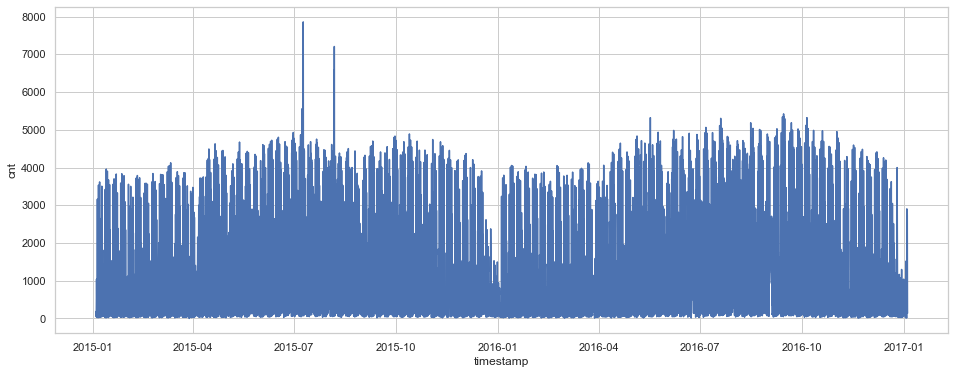

In [95]:
sns.lineplot(x=df.timestamp, y=df.cnt)

# It's very hard to make sense of this graph

In [96]:
#3

In [97]:
df.sort_values('timestamp', inplace=True)
df.set_index('timestamp', drop=False, inplace=True)

<AxesSubplot:xlabel='timestamp'>

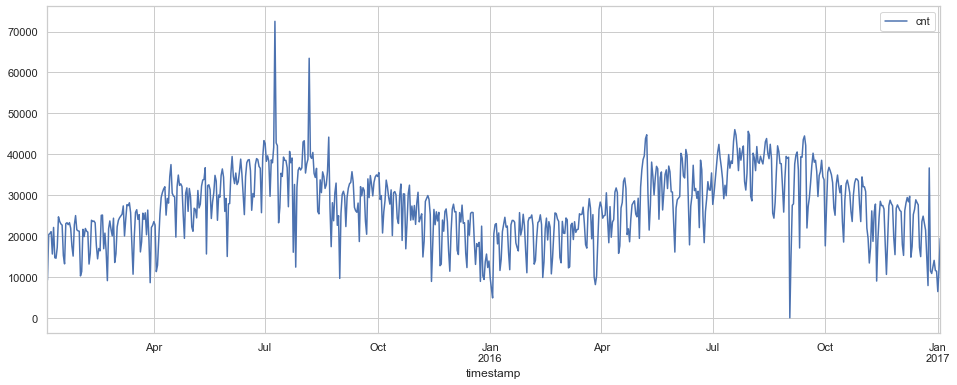

In [98]:
df.resample('D').agg({'cnt':'sum'}).plot()

In [99]:
#4

                 cnt
timestamp           
2015-01-04       NaN
2015-01-05       NaN
2015-01-06  16739.67
2015-01-07  20683.00
2015-01-08  19092.67
...              ...
2016-12-30  12682.00
2016-12-31  12347.33
2017-01-01   9803.67
2017-01-02   9889.33
2017-01-03  12560.00

[731 rows x 1 columns]


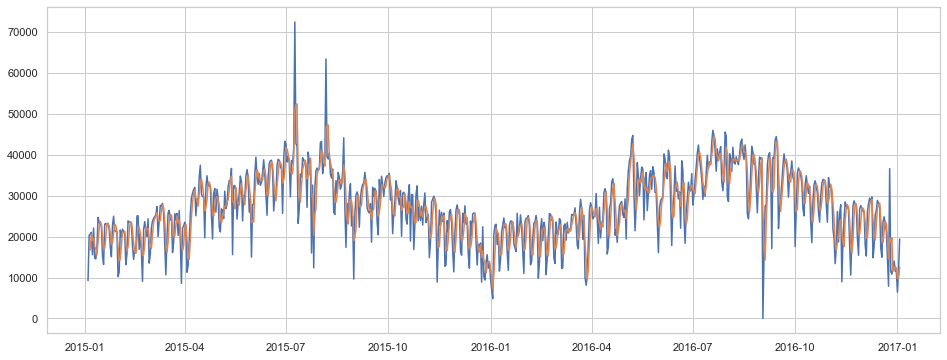

In [114]:
daily_agg = df.resample('D').agg({'cnt':'sum'})

rolling = round(daily_agg.rolling(window=3).mean(), 2)

print(rolling)

plt.plot(daily_agg)
plt.plot(rolling, label="rolling") 

In [101]:
round(rolling.loc['2015-07-09', 'cnt'])

50705

In [102]:
#5

In [103]:
difference = daily_agg['cnt'] - rolling['cnt']

std = round(np.std(difference), 2)
std

4558.59

In [104]:
#6

In [105]:
upper_b = rolling.cnt + (2.576 * std)
lower_b = rolling.cnt - (2.576 * std)

In [106]:
round(upper_b.iloc[730], 2)

24302.93

In [107]:
daily_agg['upper_bound'] = upper_b
daily_agg['lower_bound'] = lower_b

In [108]:
daily_agg

,cnt,upper_bound,lower_bound
timestamp,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,28482.59784,4996.74216
2015-01-07,21064,32425.92784,8940.07216
2015-01-08,15601,30835.59784,7349.74216
...,...,...,...
2016-12-30,11566,24424.92784,939.07216
2016-12-31,11424,24090.25784,604.40216
2017-01-01,6421,21546.59784,-1939.25784


In [109]:
#7,8

The date with the highest number of leases: cnt    72504
Name: 2015-07-09 00:00:00, dtype: int64
The date with the low number of rentals: cnt    0
Name: 2016-09-02 00:00:00, dtype: int64


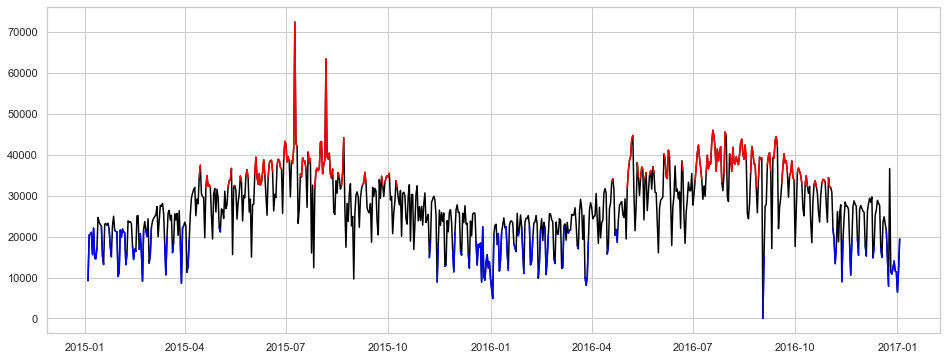

In [161]:
anomalous_high_values = daily_agg[daily_agg > daily_agg.cnt.mean() + std]
anomalous_low_values = daily_agg[daily_agg < daily_agg.cnt.mean() - std]


plt.plot(daily_agg.cnt, color='black')
plt.plot(anomalous_high_values.cnt, color='red')
plt.plot(anomalous_low_values.cnt, color='blue')

print("The date with the highest number of leases: " + str(daily_agg.loc[daily_agg['cnt'].idxmax()]))
# The reason for this is that there was a mass strike of bus and train workers on that day. 
# https://metro.co.uk/2015/07/09/london-tube-strikes-people-are-already-saying-its-absolute-carnage-out-there-5287139/  

print("The date with the low number of rentals: " + str(daily_agg.loc[daily_agg['cnt'].idxmin()]))
# This day nothing happened, it was a mistake in the data entry 